# Linear Regression Cheatsheet

Simple linear regression using scikit-learn.

In [6]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [7]:
# Load data
df = pd.read_csv('./archive/iris.csv')
# Use SepalLengthCm as X and PetalLengthCm as y for demo
X = df[['SepalLengthCm']]
y = df['PetalLengthCm']

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create and fit model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Get slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')

Slope: 1.832836834279381
Intercept: -6.919754643134638


In [11]:
# Predict
y_pred = model.predict(X_test)
print(y_pred[:5])

[4.26055005 3.52741531 7.19308898 4.07726636 5.54353583]


In [12]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 0.5965145177566363
R²: 0.8179909257095002


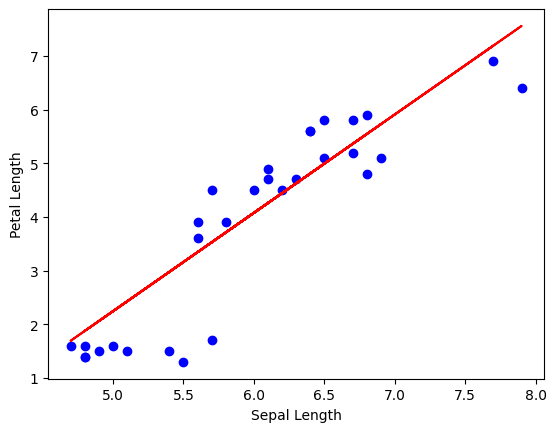

In [13]:
# Plot
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

## Assumptions of Linear Regression
- Linearity
- Independence
- Homoscedasticity
- Normality of residuals
- No multicollinearity (for multiple regression)

## Checking Linearity Assumptions

The following cells demonstrate how to check the key assumptions of linear regression.

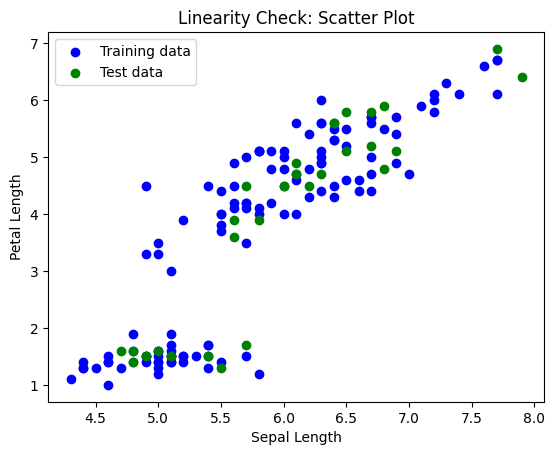

In [14]:
# 1. Linearity: Scatter plot of X vs y
# Check if the relationship between X and y is linear
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Linearity Check: Scatter Plot')
plt.legend()
plt.show()

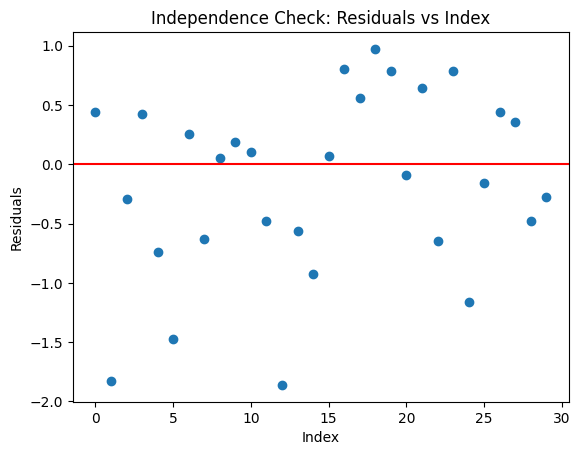

In [15]:
# 2. Independence: Check for autocorrelation in residuals
# For simple linear regression, independence is often assumed.
# Use Durbin-Watson test for time series or sequential data.
# Here, we can plot residuals vs index to visually check.
residuals = y_test - y_pred
plt.scatter(range(len(residuals)), residuals)
plt.axhline(0, color='red')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Independence Check: Residuals vs Index')
plt.show()

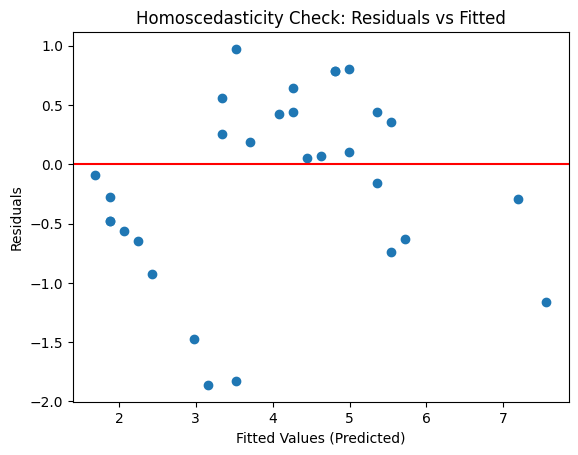

In [16]:
# 3. Homoscedasticity: Residuals vs Fitted values
# Check if residuals have constant variance
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red')
plt.xlabel('Fitted Values (Predicted)')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check: Residuals vs Fitted')
plt.show()

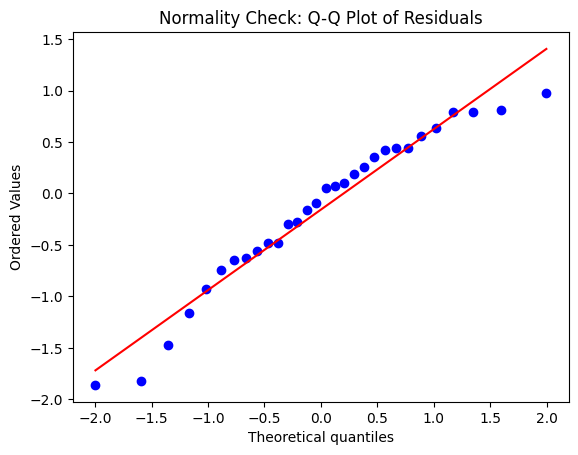

In [17]:
# 4. Normality of Residuals: Q-Q Plot
# Check if residuals are normally distributed
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normality Check: Q-Q Plot of Residuals')
plt.show()

In [18]:
# Shapiro-Wilk Test for Normality
from scipy.stats import shapiro
stat, p = shapiro(residuals)
print(f'Statistic: {stat:.4f}, p-value: {p:.4f}')
if p > 0.05:
    print('Residuals are normally distributed (fail to reject H0)')
else:
    print('Residuals are not normally distributed (reject H0)')

Statistic: 0.9474, p-value: 0.1435
Residuals are normally distributed (fail to reject H0)


## 5. No Multicollinearity
For simple linear regression (one predictor), multicollinearity is not applicable.  
For multiple regression, check Variance Inflation Factor (VIF) for each predictor.  
Example (if multiple X):  
```python
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)
```
VIF > 5 or 10 indicates high multicollinearity.